In [3]:
import matplotlib.pyplot as plt
import scipy.stats as sp
import numpy as np

In [4]:
a=0.1
b=0.3
gamma=0.5
beta=0.8

mu = lambda t: a+b*t
def offspring_intensity(eta,t):
    return eta*np.exp(-beta*(t))

In [9]:
intensity_equation = lambda t: 0.5*np.sin(t)+0.5
def integral_equation(t,t_prev):
    return 1-np.exp(0.5*(np.cos(t)-np.cos(t_prev)+t_prev-t)) 
def cumulative_spike(T_start,t_current,Depth,beta):
    cumulative_intensity=0
    for i in range(len(T_start)):
        if T_start[i]<=t_current:
            cumulative_intensity+=Depth[i]*np.e**(-beta*(t_current-T_start[i]))
    return cumulative_intensity

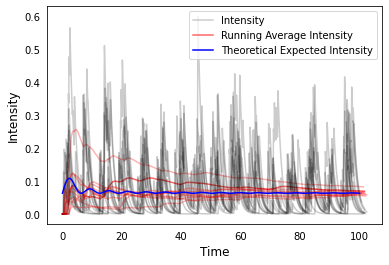

In [11]:
for i in range(10): 
    T=[0]
    Depth=[0]
    threshold=1
    lam=0.5
    r=100
    while T[-1]<r:
        p=sp.uniform.rvs(size=1)[0]

        t=0
        while integral_equation(T[-1]+t,T[-1])<p:
            t+=0.01
            if t>r:
                t=r
                break
        T.append(T[-1]+t)
        Depth.append(sp.uniform.rvs(size=1)[0]*0.2)

    x=np.linspace(0,T[-1]-0.01,1000)
    intensity=[cumulative_spike(T,t,Depth,0.8) for t in x]
    if i==0:
        plt.plot(x,intensity,'black',alpha=0.2,label='Intensity')
    else:
        plt.plot(x,intensity,'black',alpha=0.2)
    intensities=[cumulative_spike(T,t,Depth,0.8) for t in x]
    running_average=[sum(intensities[0:i])/len(intensities[0:i]) for i in range(1,len(intensities))]
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True) 
    plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=True)
    if i==0:
        plt.plot(x[1:],running_average,'red',alpha=0.6,label='Running Average Intensity')
    else:
        plt.plot(x[1:],running_average,'red',alpha=0.3)
expected_intensity_equation=lambda t: (0.5-0.5*np.cos(t)+0.5*t)*0.1/(0.8*t)
x=np.linspace(0.01,r,1000)
plt.plot(x,[expected_intensity_equation(t) for t in x],'blue',label='Theoretical Expected Intensity')
plt.xlabel('Time',fontsize=12)
plt.ylabel('Intensity',fontsize=12)
plt.legend(fontsize=10)
#plt.savefig('dspp_realisation_expected_intensity2.pdf')

In [ ]:
intensity_equation = lambda t: 0.5*np.sin(t)+0.5
def integral_equation(t,t_prev):
    return 1-np.exp(0.5*(np.cos(t)-np.cos(t_prev)+t_prev-t)) 
def cumulative_spike(T_start,t_current,Depth,beta):
    cumulative_intensity=0
    for i in range(len(T_start)):
        if T_start[i]<=t_current:
            cumulative_intensity+=Depth[i]*np.e**(-beta*(t_current-T_start[i]))
    return cumulative_intensity+intensity_equation(t_current)

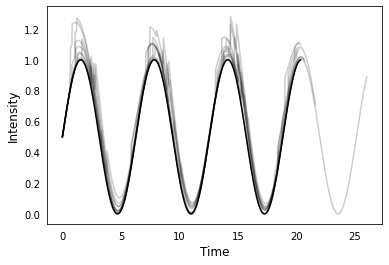

In [7]:
for i in range(10): 
    T=[0]
    Depth=[0]
    threshold=1
    lam=0.5
    r=20
    while T[-1]<r:
        p=sp.uniform.rvs(size=1)[0]

        t=0
        while integral_equation(T[-1]+t,T[-1])<p:
            t+=0.01
            if t>r:
                t=r
                break
        T.append(T[-1]+t)
        Depth.append(sp.uniform.rvs(size=1)[0]*0.2)

    x=np.linspace(0,T[-1]-0.01,1000)
    intensity=[cumulative_spike(T,t,Depth,0.8) for t in x]
    if i==0:
        plt.plot(x,intensity,'black',alpha=0.2,label='Intensity')
    else:
        plt.plot(x,intensity,'black',alpha=0.2)
    
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True) 
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=True)

plt.xlabel('Time',fontsize=12)
plt.ylabel('Intensity',fontsize=12)
plt.plot(x,[intensity_equation(t) for t in x],'black')
plt.savefig('dspp_realisation_expected_intensity3.pdf')